# ASSIGNMENT NO. 05<a href="#ASSIGNMENT-NO.-05" class="anchor-link">¶</a>

## Multiple Linear Regression-1<a href="#Multiple-Linear-Regression-1" class="anchor-link">¶</a>

In \[1\]:

    # Import Libraries
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    import statsmodels.formula.api as smf
    import statsmodels.api as sm
    from statsmodels.graphics.regressionplots import influence_plot

In \[3\]:

    # import dataset
    toyo=pd.read_csv('ToyotaCorolla.csv',encoding='latin1')
    toyo

Out\[3\]:

|      | Id   | Model                                             | Price | Age_08_04 | Mfg_Month | Mfg_Year | KM    | Fuel_Type | HP  | Met_Color | ... | Central_Lock | Powered_Windows | Power_Steering | Radio | Mistlamps | Sport_Model | Backseat_Divider | Metallic_Rim | Radio_cassette | Tow_Bar |
|------|------|---------------------------------------------------|-------|-----------|-----------|----------|-------|-----------|-----|-----------|-----|--------------|-----------------|----------------|-------|-----------|-------------|------------------|--------------|----------------|---------|
| 0    | 1    | TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors     | 13500 | 23        | 10        | 2002     | 46986 | Diesel    | 90  | 1         | ... | 1            | 1               | 1              | 0     | 0         | 0           | 1                | 0            | 0              | 0       |
| 1    | 2    | TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors     | 13750 | 23        | 10        | 2002     | 72937 | Diesel    | 90  | 1         | ... | 1            | 0               | 1              | 0     | 0         | 0           | 1                | 0            | 0              | 0       |
| 2    | 3    | TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors     | 13950 | 24        | 9         | 2002     | 41711 | Diesel    | 90  | 1         | ... | 0            | 0               | 1              | 0     | 0         | 0           | 1                | 0            | 0              | 0       |
| 3    | 4    | TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors     | 14950 | 26        | 7         | 2002     | 48000 | Diesel    | 90  | 0         | ... | 0            | 0               | 1              | 0     | 0         | 0           | 1                | 0            | 0              | 0       |
| 4    | 5    | TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors       | 13750 | 30        | 3         | 2002     | 38500 | Diesel    | 90  | 0         | ... | 1            | 1               | 1              | 0     | 1         | 0           | 1                | 0            | 0              | 0       |
| ...  | ...  | ...                                               | ...   | ...       | ...       | ...      | ...   | ...       | ... | ...       | ... | ...          | ...             | ...            | ...   | ...       | ...         | ...              | ...          | ...            | ...     |
| 1431 | 1438 | TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors        | 7500  | 69        | 12        | 1998     | 20544 | Petrol    | 86  | 1         | ... | 1            | 1               | 1              | 0     | 1         | 1           | 1                | 0            | 0              | 0       |
| 1432 | 1439 | TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-... | 10845 | 72        | 9         | 1998     | 19000 | Petrol    | 86  | 0         | ... | 0            | 0               | 1              | 0     | 0         | 1           | 1                | 0            | 0              | 0       |
| 1433 | 1440 | TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-... | 8500  | 71        | 10        | 1998     | 17016 | Petrol    | 86  | 0         | ... | 0            | 0               | 1              | 0     | 0         | 0           | 1                | 0            | 0              | 0       |
| 1434 | 1441 | TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-... | 7250  | 70        | 11        | 1998     | 16916 | Petrol    | 86  | 1         | ... | 0            | 0               | 0              | 0     | 0         | 0           | 1                | 0            | 0              | 0       |
| 1435 | 1442 | TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors       | 6950  | 76        | 5         | 1998     | 1     | Petrol    | 110 | 0         | ... | 0            | 0               | 1              | 0     | 0         | 0           | 0                | 0            | 0              | 0       |

1436 rows × 38 columns

## EDA<a href="#EDA" class="anchor-link">¶</a>

In \[4\]:

    toyo.info()

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 1436 entries, 0 to 1435
    Data columns (total 38 columns):
     #   Column            Non-Null Count  Dtype 
    ---  ------            --------------  ----- 
     0   Id                1436 non-null   int64 
     1   Model             1436 non-null   object
     2   Price             1436 non-null   int64 
     3   Age_08_04         1436 non-null   int64 
     4   Mfg_Month         1436 non-null   int64 
     5   Mfg_Year          1436 non-null   int64 
     6   KM                1436 non-null   int64 
     7   Fuel_Type         1436 non-null   object
     8   HP                1436 non-null   int64 
     9   Met_Color         1436 non-null   int64 
     10  Color             1436 non-null   object
     11  Automatic         1436 non-null   int64 
     12  cc                1436 non-null   int64 
     13  Doors             1436 non-null   int64 
     14  Cylinders         1436 non-null   int64 
     15  Gears             1436 non-null   int64 
     16  Quarterly_Tax     1436 non-null   int64 
     17  Weight            1436 non-null   int64 
     18  Mfr_Guarantee     1436 non-null   int64 
     19  BOVAG_Guarantee   1436 non-null   int64 
     20  Guarantee_Period  1436 non-null   int64 
     21  ABS               1436 non-null   int64 
     22  Airbag_1          1436 non-null   int64 
     23  Airbag_2          1436 non-null   int64 
     24  Airco             1436 non-null   int64 
     25  Automatic_airco   1436 non-null   int64 
     26  Boardcomputer     1436 non-null   int64 
     27  CD_Player         1436 non-null   int64 
     28  Central_Lock      1436 non-null   int64 
     29  Powered_Windows   1436 non-null   int64 
     30  Power_Steering    1436 non-null   int64 
     31  Radio             1436 non-null   int64 
     32  Mistlamps         1436 non-null   int64 
     33  Sport_Model       1436 non-null   int64 
     34  Backseat_Divider  1436 non-null   int64 
     35  Metallic_Rim      1436 non-null   int64 
     36  Radio_cassette    1436 non-null   int64 
     37  Tow_Bar           1436 non-null   int64 
    dtypes: int64(35), object(3)
    memory usage: 426.4+ KB

In \[5\]:

    toyo2=pd.concat([toyo.iloc[:,2:4],toyo.iloc[:,6:7],toyo.iloc[:,8:9],toyo.iloc[:,12:14],toyo.iloc[:,15:18]],axis=1)
    toyo2

Out\[5\]:

|      | Price | Age_08_04 | KM    | HP  | cc   | Doors | Gears | Quarterly_Tax | Weight |
|------|-------|-----------|-------|-----|------|-------|-------|---------------|--------|
| 0    | 13500 | 23        | 46986 | 90  | 2000 | 3     | 5     | 210           | 1165   |
| 1    | 13750 | 23        | 72937 | 90  | 2000 | 3     | 5     | 210           | 1165   |
| 2    | 13950 | 24        | 41711 | 90  | 2000 | 3     | 5     | 210           | 1165   |
| 3    | 14950 | 26        | 48000 | 90  | 2000 | 3     | 5     | 210           | 1165   |
| 4    | 13750 | 30        | 38500 | 90  | 2000 | 3     | 5     | 210           | 1170   |
| ...  | ...   | ...       | ...   | ... | ...  | ...   | ...   | ...           | ...    |
| 1431 | 7500  | 69        | 20544 | 86  | 1300 | 3     | 5     | 69            | 1025   |
| 1432 | 10845 | 72        | 19000 | 86  | 1300 | 3     | 5     | 69            | 1015   |
| 1433 | 8500  | 71        | 17016 | 86  | 1300 | 3     | 5     | 69            | 1015   |
| 1434 | 7250  | 70        | 16916 | 86  | 1300 | 3     | 5     | 69            | 1015   |
| 1435 | 6950  | 76        | 1     | 110 | 1600 | 5     | 5     | 19            | 1114   |

1436 rows × 9 columns

In \[7\]:

    toyo3=toyo2.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'},axis=1)
    toyo3

Out\[7\]:

|      | Price | Age | KM    | HP  | CC   | Doors | Gears | QT  | Weight |
|------|-------|-----|-------|-----|------|-------|-------|-----|--------|
| 0    | 13500 | 23  | 46986 | 90  | 2000 | 3     | 5     | 210 | 1165   |
| 1    | 13750 | 23  | 72937 | 90  | 2000 | 3     | 5     | 210 | 1165   |
| 2    | 13950 | 24  | 41711 | 90  | 2000 | 3     | 5     | 210 | 1165   |
| 3    | 14950 | 26  | 48000 | 90  | 2000 | 3     | 5     | 210 | 1165   |
| 4    | 13750 | 30  | 38500 | 90  | 2000 | 3     | 5     | 210 | 1170   |
| ...  | ...   | ... | ...   | ... | ...  | ...   | ...   | ... | ...    |
| 1431 | 7500  | 69  | 20544 | 86  | 1300 | 3     | 5     | 69  | 1025   |
| 1432 | 10845 | 72  | 19000 | 86  | 1300 | 3     | 5     | 69  | 1015   |
| 1433 | 8500  | 71  | 17016 | 86  | 1300 | 3     | 5     | 69  | 1015   |
| 1434 | 7250  | 70  | 16916 | 86  | 1300 | 3     | 5     | 69  | 1015   |
| 1435 | 6950  | 76  | 1     | 110 | 1600 | 5     | 5     | 19  | 1114   |

1436 rows × 9 columns

In \[8\]:

    toyo3[toyo3.duplicated()]

Out\[8\]:

|     | Price | Age | KM    | HP  | CC   | Doors | Gears | QT  | Weight |
|-----|-------|-----|-------|-----|------|-------|-------|-----|--------|
| 113 | 24950 | 8   | 13253 | 116 | 2000 | 5     | 5     | 234 | 1320   |

In \[9\]:

    toyo4=toyo3.drop_duplicates().reset_index(drop=True)
    toyo4

Out\[9\]:

|      | Price | Age | KM    | HP  | CC   | Doors | Gears | QT  | Weight |
|------|-------|-----|-------|-----|------|-------|-------|-----|--------|
| 0    | 13500 | 23  | 46986 | 90  | 2000 | 3     | 5     | 210 | 1165   |
| 1    | 13750 | 23  | 72937 | 90  | 2000 | 3     | 5     | 210 | 1165   |
| 2    | 13950 | 24  | 41711 | 90  | 2000 | 3     | 5     | 210 | 1165   |
| 3    | 14950 | 26  | 48000 | 90  | 2000 | 3     | 5     | 210 | 1165   |
| 4    | 13750 | 30  | 38500 | 90  | 2000 | 3     | 5     | 210 | 1170   |
| ...  | ...   | ... | ...   | ... | ...  | ...   | ...   | ... | ...    |
| 1430 | 7500  | 69  | 20544 | 86  | 1300 | 3     | 5     | 69  | 1025   |
| 1431 | 10845 | 72  | 19000 | 86  | 1300 | 3     | 5     | 69  | 1015   |
| 1432 | 8500  | 71  | 17016 | 86  | 1300 | 3     | 5     | 69  | 1015   |
| 1433 | 7250  | 70  | 16916 | 86  | 1300 | 3     | 5     | 69  | 1015   |
| 1434 | 6950  | 76  | 1     | 110 | 1600 | 5     | 5     | 19  | 1114   |

1435 rows × 9 columns

In \[10\]:

    toyo4.describe()

Out\[10\]:

|       | Price        | Age         | KM            | HP          | CC           | Doors       | Gears       | QT          | Weight      |
|-------|--------------|-------------|---------------|-------------|--------------|-------------|-------------|-------------|-------------|
| count | 1435.000000  | 1435.000000 | 1435.000000   | 1435.000000 | 1435.000000  | 1435.000000 | 1435.000000 | 1435.000000 | 1435.000000 |
| mean  | 10720.915679 | 55.980488   | 68571.782578  | 101.491986  | 1576.560976  | 4.032753    | 5.026481    | 87.020209   | 1072.287108 |
| std   | 3608.732978  | 18.563312   | 37491.094553  | 14.981408   | 424.387533   | 0.952667    | 0.188575    | 40.959588   | 52.251882   |
| min   | 4350.000000  | 1.000000    | 1.000000      | 69.000000   | 1300.000000  | 2.000000    | 3.000000    | 19.000000   | 1000.000000 |
| 25%   | 8450.000000  | 44.000000   | 43000.000000  | 90.000000   | 1400.000000  | 3.000000    | 5.000000    | 69.000000   | 1040.000000 |
| 50%   | 9900.000000  | 61.000000   | 63451.000000  | 110.000000  | 1600.000000  | 4.000000    | 5.000000    | 85.000000   | 1070.000000 |
| 75%   | 11950.000000 | 70.000000   | 87041.500000  | 110.000000  | 1600.000000  | 5.000000    | 5.000000    | 85.000000   | 1085.000000 |
| max   | 32500.000000 | 80.000000   | 243000.000000 | 192.000000  | 16000.000000 | 5.000000    | 6.000000    | 283.000000  | 1615.000000 |

## Correlation Analysis<a href="#Correlation-Analysis" class="anchor-link">¶</a>

In \[11\]:

    toyo4.corr()

Out\[11\]:

|        | Price     | Age       | KM        | HP        | CC        | Doors     | Gears     | QT        | Weight    |
|--------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|
| Price  | 1.000000  | -0.876273 | -0.569420 | 0.314134  | 0.124375  | 0.183604  | 0.063831  | 0.211508  | 0.575869  |
| Age    | -0.876273 | 1.000000  | 0.504575  | -0.155293 | -0.096549 | -0.146929 | -0.005629 | -0.193319 | -0.466484 |
| KM     | -0.569420 | 0.504575  | 1.000000  | -0.332904 | 0.103822  | -0.035193 | 0.014890  | 0.283312  | -0.023969 |
| HP     | 0.314134  | -0.155293 | -0.332904 | 1.000000  | 0.035207  | 0.091803  | 0.209642  | -0.302287 | 0.087143  |
| CC     | 0.124375  | -0.096549 | 0.103822  | 0.035207  | 1.000000  | 0.079254  | 0.014732  | 0.305982  | 0.335077  |
| Doors  | 0.183604  | -0.146929 | -0.035193 | 0.091803  | 0.079254  | 1.000000  | -0.160101 | 0.107353  | 0.301734  |
| Gears  | 0.063831  | -0.005629 | 0.014890  | 0.209642  | 0.014732  | -0.160101 | 1.000000  | -0.005125 | 0.021238  |
| QT     | 0.211508  | -0.193319 | 0.283312  | -0.302287 | 0.305982  | 0.107353  | -0.005125 | 1.000000  | 0.621988  |
| Weight | 0.575869  | -0.466484 | -0.023969 | 0.087143  | 0.335077  | 0.301734  | 0.021238  | 0.621988  | 1.000000  |

In \[12\]:

    sns.set_style(style='darkgrid')
    sns.pairplot(toyo4)

Out\[12\]:

    <seaborn.axisgrid.PairGrid at 0x274118c3df0>

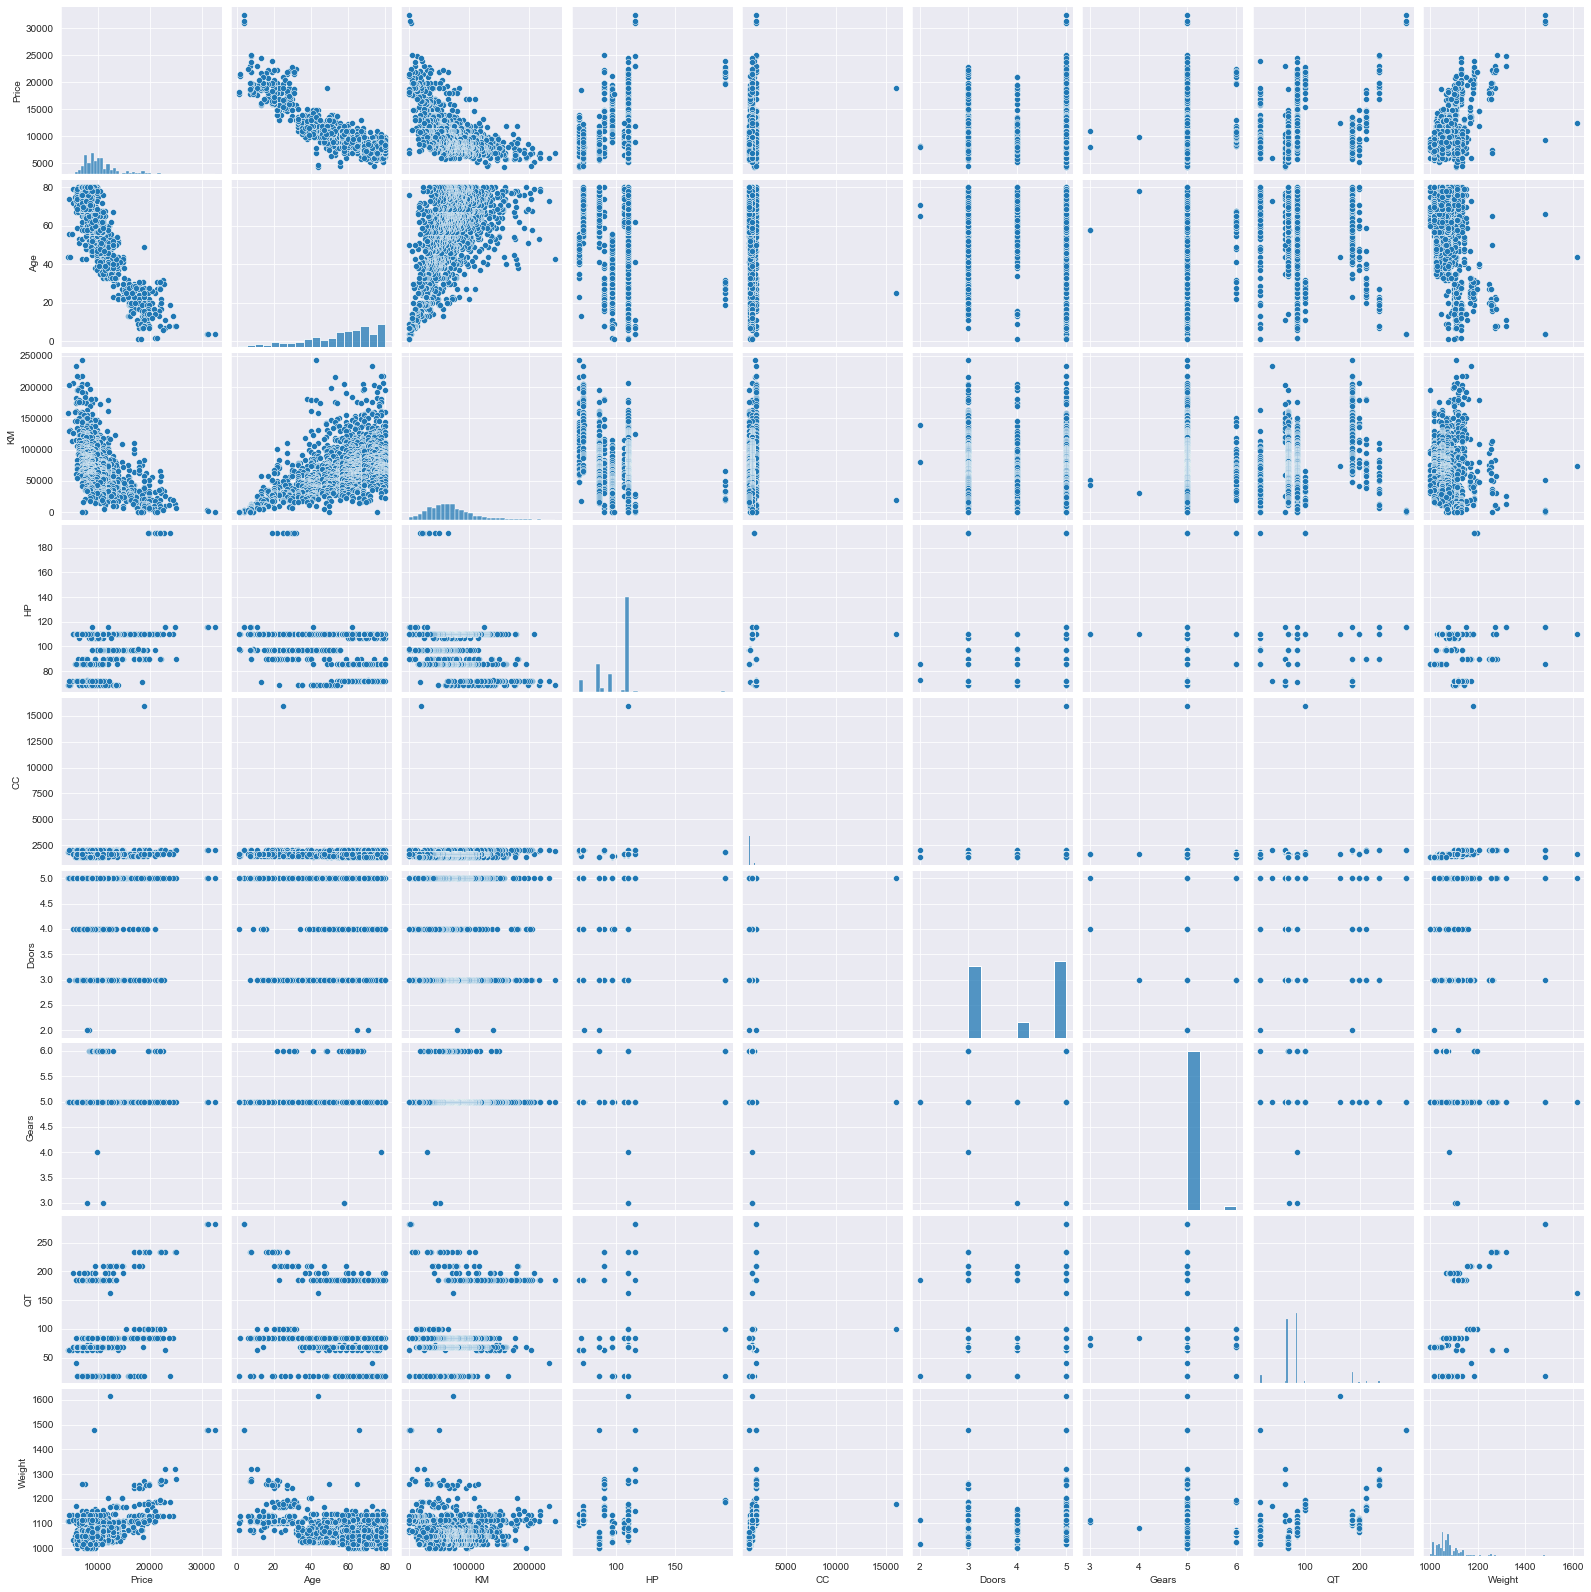

## Model Building<a href="#Model-Building" class="anchor-link">¶</a>

In \[13\]:

    model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=toyo4).fit()

## Model Testing<a href="#Model-Testing" class="anchor-link">¶</a>

In \[14\]:

    # Finding Coefficient parameters
    model.params

Out\[14\]:

    Intercept   -5472.540368
    Age          -121.713891
    KM             -0.020737
    HP             31.584612
    CC             -0.118558
    Doors          -0.920189
    Gears         597.715894
    QT              3.858805
    Weight         16.855470
    dtype: float64

In \[15\]:

    # Finding tvalues and pvalues
    model.tvalues , np.round(model.pvalues,5)

Out\[15\]:

    (Intercept    -3.875273
     Age         -46.551876
     KM          -16.552424
     HP           11.209719
     CC           -1.316436
     Doors        -0.023012
     Gears         3.034563
     QT            2.944198
     Weight       15.760663
     dtype: float64,
     Intercept    0.00011
     Age          0.00000
     KM           0.00000
     HP           0.00000
     CC           0.18824
     Doors        0.98164
     Gears        0.00245
     QT           0.00329
     Weight       0.00000
     dtype: float64)

In \[16\]:

    # Finding rsquared values
    model.rsquared , model.rsquared_adj   # Model accuracy is 86.17%

Out\[16\]:

    (0.8625200256947, 0.8617487495415146)

In \[17\]:

    # Build SLR and MLR models for insignificant variables 'CC' and 'Doors'
    # Also find their tvalues and pvalues

In \[18\]:

    slr_c=smf.ols('Price~CC',data=toyo4).fit()
    slr_c.tvalues , slr_c.pvalues # CC has significant pvalue

Out\[18\]:

    (Intercept    24.879592
     CC            4.745039
     dtype: float64,
     Intercept    7.236022e-114
     CC            2.292856e-06
     dtype: float64)

In \[19\]:

    slr_d=smf.ols('Price~Doors',data=toyo4).fit()
    slr_d.tvalues , slr_d.pvalues # Doors has significant pvalue

Out\[19\]:

    (Intercept    19.421546
     Doors         7.070520
     dtype: float64,
     Intercept    8.976407e-75
     Doors        2.404166e-12
     dtype: float64)

In \[20\]:

    mlr_cd=smf.ols('Price~CC+Doors',data=toyo4).fit()
    mlr_cd.tvalues , mlr_cd.pvalues # CC & Doors have significant pvalue

Out\[20\]:

    (Intercept    12.786341
     CC            4.268006
     Doors         6.752236
     dtype: float64,
     Intercept    1.580945e-35
     CC           2.101878e-05
     Doors        2.109558e-11
     dtype: float64)

## Model Validation Techniques<a href="#Model-Validation-Techniques" class="anchor-link">¶</a>

### Two Techniques: 1. Collinearity Check & 2. Residual Analysis<a href="#Two-Techniques:-1.-Collinearity-Check-&amp;-2.-Residual-Analysis" class="anchor-link">¶</a>

In \[21\]:

    # 1) Collinearity Problem Check
    # Calculate VIF = 1/(1-Rsquare) for all independent variables

    rsq_age=smf.ols('Age~KM+HP+CC+Doors+Gears+QT+Weight',data=toyo4).fit().rsquared
    vif_age=1/(1-rsq_age)

    rsq_KM=smf.ols('KM~Age+HP+CC+Doors+Gears+QT+Weight',data=toyo4).fit().rsquared
    vif_KM=1/(1-rsq_KM)

    rsq_HP=smf.ols('HP~Age+KM+CC+Doors+Gears+QT+Weight',data=toyo4).fit().rsquared
    vif_HP=1/(1-rsq_HP)

    rsq_CC=smf.ols('CC~Age+KM+HP+Doors+Gears+QT+Weight',data=toyo4).fit().rsquared
    vif_CC=1/(1-rsq_CC)

    rsq_DR=smf.ols('Doors~Age+KM+HP+CC+Gears+QT+Weight',data=toyo4).fit().rsquared
    vif_DR=1/(1-rsq_DR)

    rsq_GR=smf.ols('Gears~Age+KM+HP+CC+Doors+QT+Weight',data=toyo4).fit().rsquared
    vif_GR=1/(1-rsq_GR)

    rsq_QT=smf.ols('QT~Age+KM+HP+CC+Doors+Gears+Weight',data=toyo4).fit().rsquared
    vif_QT=1/(1-rsq_QT)

    rsq_WT=smf.ols('Weight~Age+KM+HP+CC+Doors+Gears+QT',data=toyo4).fit().rsquared
    vif_WT=1/(1-rsq_WT)

    # Putting the values in Dataframe format
    d1={'Variables':['Age','KM','HP','CC','Doors','Gears','QT','Weight'],
        'Vif':[vif_age,vif_KM,vif_HP,vif_CC,vif_DR,vif_GR,vif_QT,vif_WT]}
    Vif_df=pd.DataFrame(d1)
    Vif_df

Out\[21\]:

|     | Variables | Vif      |
|-----|-----------|----------|
| 0   | Age       | 1.876236 |
| 1   | KM        | 1.757178 |
| 2   | HP        | 1.419180 |
| 3   | CC        | 1.163470 |
| 4   | Doors     | 1.155890 |
| 5   | Gears     | 1.098843 |
| 6   | QT        | 2.295375 |
| 7   | Weight    | 2.487180 |

In \[22\]:

    # None variable has VIF>20, No Collinearity, so consider all varaibles in Regression equation

In \[23\]:

    # 2) Residual Analysis
    # Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)
    sm.qqplot(model.resid,line='q') # 'q' - A line is fit through the quartiles # line = '45'- to draw the 45-degree diagonal line
    plt.title("Normal Q-Q plot of residuals")
    plt.show()

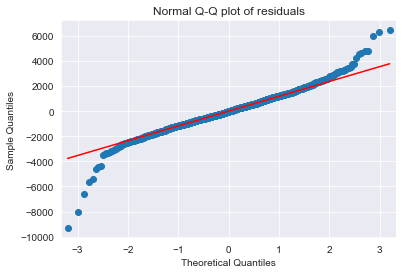

In \[24\]:

    list(np.where(model.resid>6000))  # outliar detection from above QQ plot of residuals

Out\[24\]:

    [array([109, 146, 522], dtype=int64)]

In \[25\]:

    list(np.where(model.resid<-6000))

Out\[25\]:

    [array([220, 600, 959], dtype=int64)]

In \[26\]:

    # Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)

    def standard_values(vals) : return (vals-vals.mean())/vals.std()  # User defined z = (x - mu)/sigma

In \[27\]:

    plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
    plt.title('Residual Plot')
    plt.xlabel('standardized fitted values')
    plt.ylabel('standardized residual values')
    plt.show() 

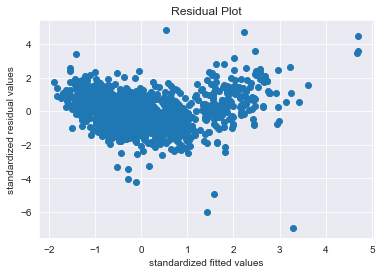

In \[28\]:

    # Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors 
    # using Residual Regression Plots code graphics.plot_regress_exog(model,'x',fig)    # exog = x-variable & endog = y-variable

In \[29\]:

    fig=plt.figure(figsize=(15,8))
    sm.graphics.plot_regress_exog(model,'Age',fig=fig)
    plt.show()

    eval_env: 1

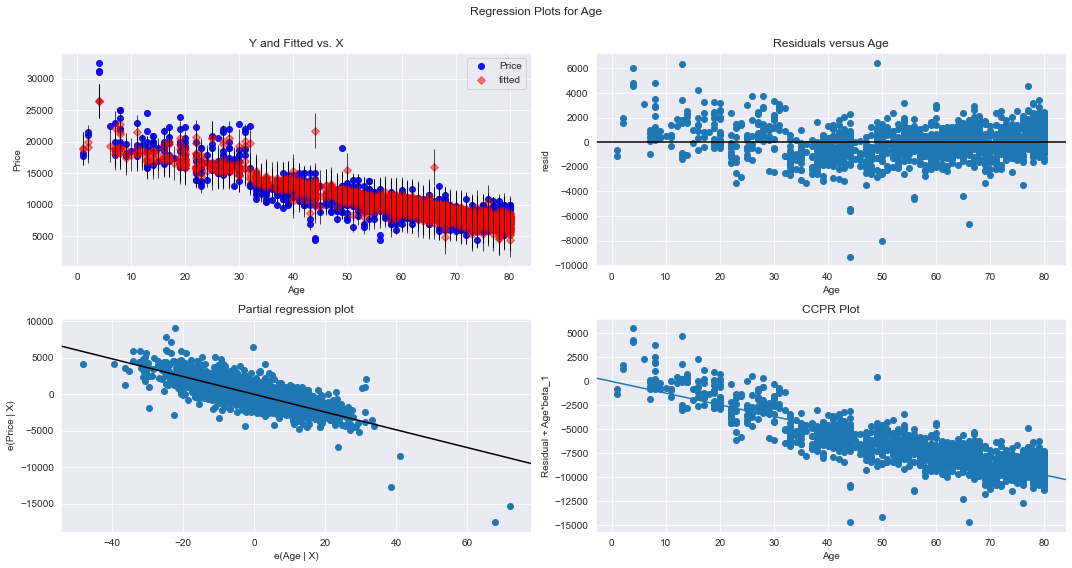

In \[30\]:

    fig=plt.figure(figsize=(15,8))
    sm.graphics.plot_regress_exog(model,'KM',fig=fig)
    plt.show()

    eval_env: 1

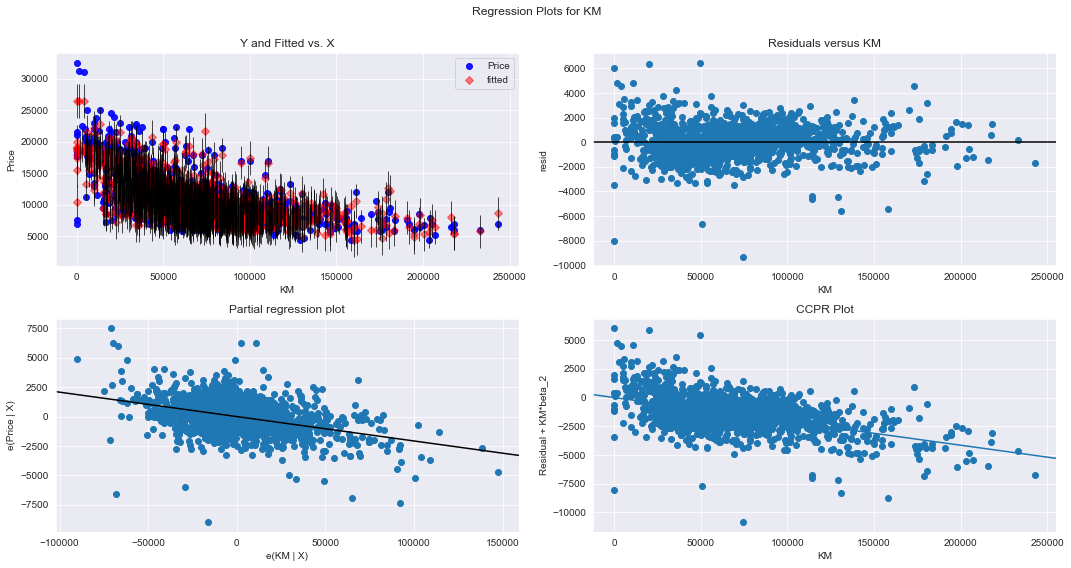

In \[31\]:

    fig=plt.figure(figsize=(15,8))
    sm.graphics.plot_regress_exog(model,'HP',fig=fig)
    plt.show()

    eval_env: 1

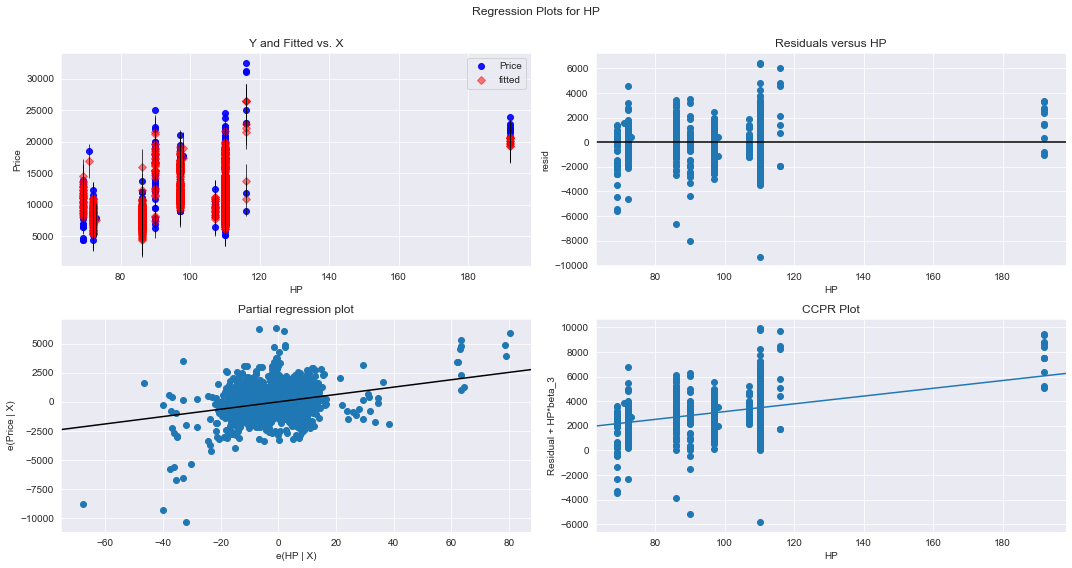

In \[32\]:

    fig=plt.figure(figsize=(15,8))
    sm.graphics.plot_regress_exog(model,'CC',fig=fig)
    plt.show()

    eval_env: 1

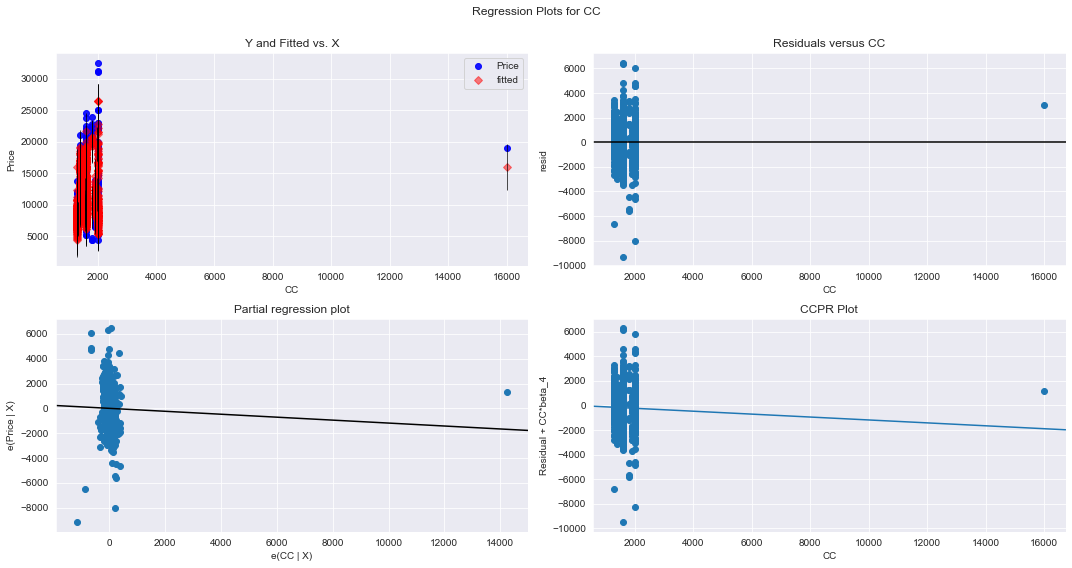

In \[33\]:

    fig=plt.figure(figsize=(15,8))
    sm.graphics.plot_regress_exog(model,'Doors',fig=fig)
    plt.show()

    eval_env: 1

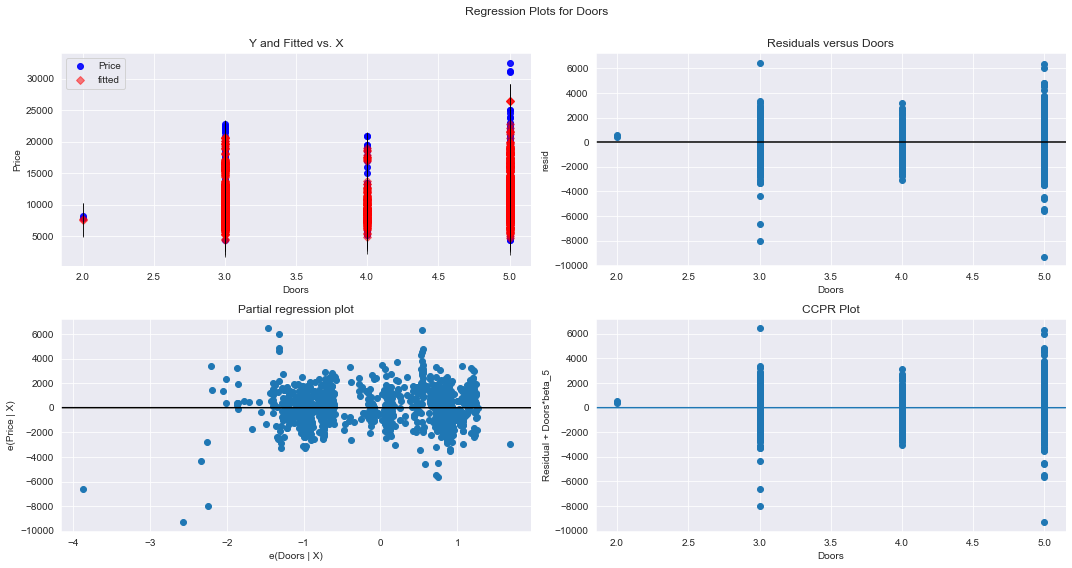

In \[34\]:

    fig=plt.figure(figsize=(15,8))
    sm.graphics.plot_regress_exog(model,'Gears',fig=fig)
    plt.show()

    eval_env: 1

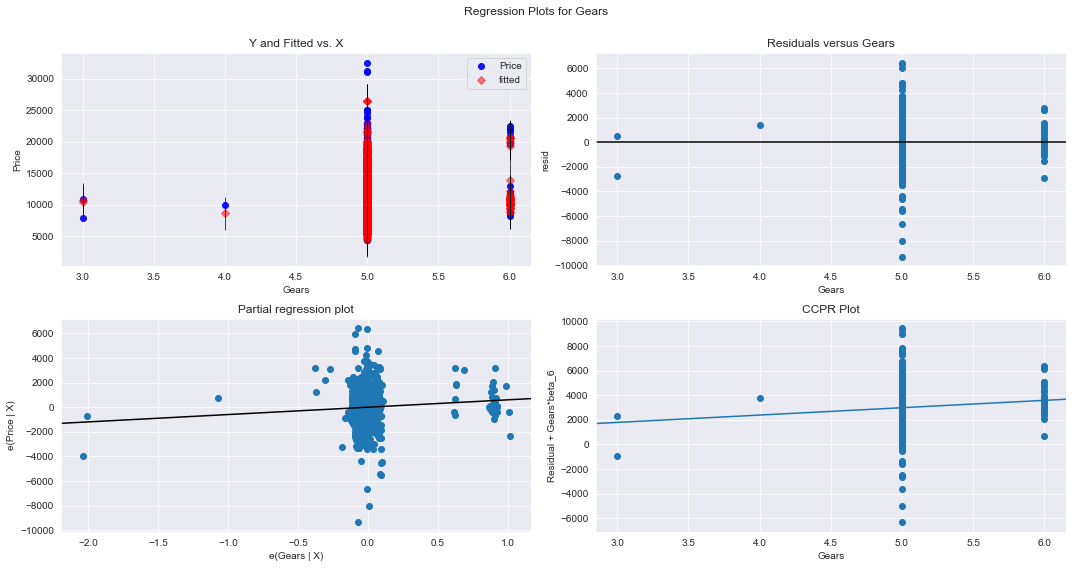

In \[35\]:

    fig=plt.figure(figsize=(15,8))
    sm.graphics.plot_regress_exog(model,'QT',fig=fig)
    plt.show()

    eval_env: 1

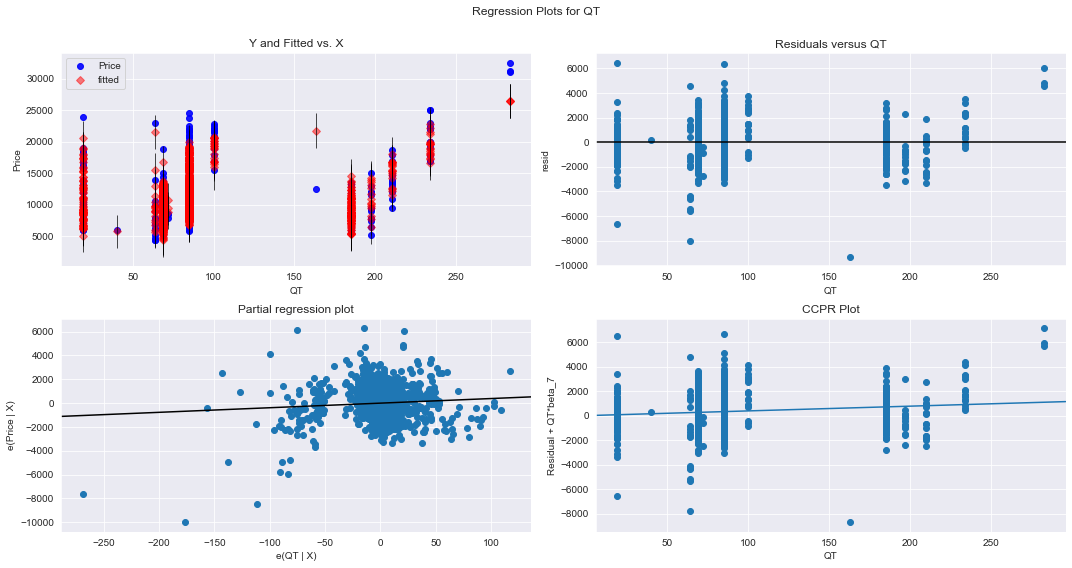

In \[36\]:

    fig=plt.figure(figsize=(15,8))
    sm.graphics.plot_regress_exog(model,'Weight',fig=fig)
    plt.show()

    eval_env: 1

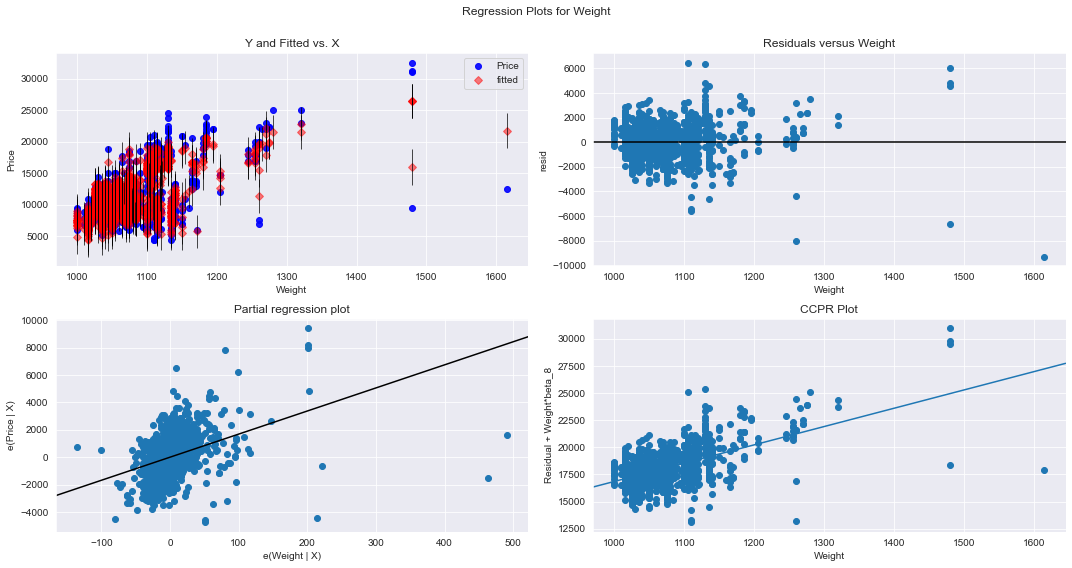

## Model Deletion Diagnostics (checking Outliers or Influencers)<a href="#Model-Deletion-Diagnostics-(checking-Outliers-or-Influencers)" class="anchor-link">¶</a>

### Two Techniques : 1. Cook's Distance & 2. Leverage value<a href="#Two-Techniques-:-1.-Cook&#39;s-Distance-&amp;-2.-Leverage-value" class="anchor-link">¶</a>

In \[37\]:

    # 1. Cook's Distance: If Cook's distance > 1, then it's an outlier
    # Get influencers using cook's distance
    (c,_)=model.get_influence().cooks_distance
    c

Out\[37\]:

    array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
           8.04110550e-07, 6.99854767e-04, 1.08408002e-02])

In \[38\]:

    # Plot the influencers using the stem plot
    fig=plt.figure(figsize=(20,7))
    plt.stem(np.arange(len(toyo4)),np.round(c,3))
    plt.xlabel('Row Index')
    plt.ylabel('Cooks Distance')
    plt.show()

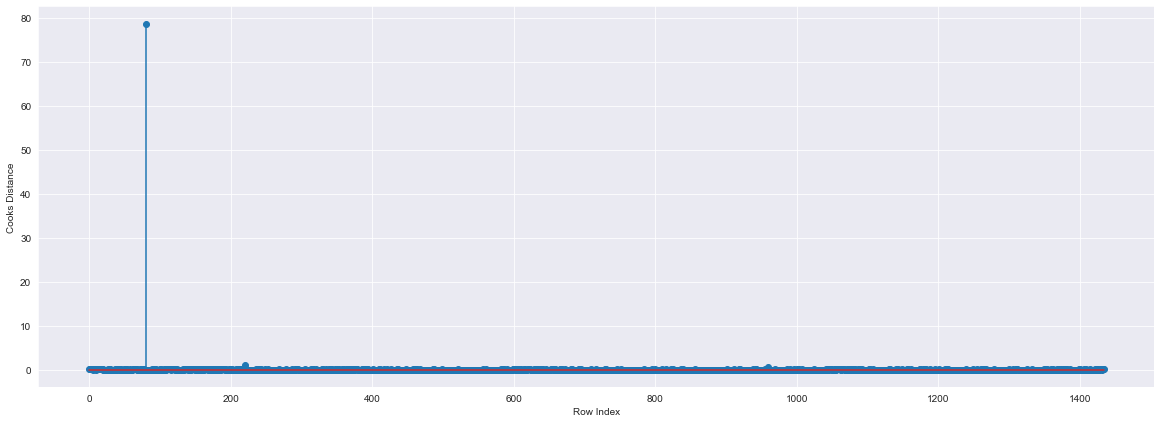

In \[39\]:

    # Index and value of influencer where C>0.5
    np.argmax(c) , np.max(c)

Out\[39\]:

    (80, 78.7295058224916)

In \[40\]:

    # 2. Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
    fig,ax=plt.subplots(figsize=(20,20))
    fig=influence_plot(model,ax = ax)

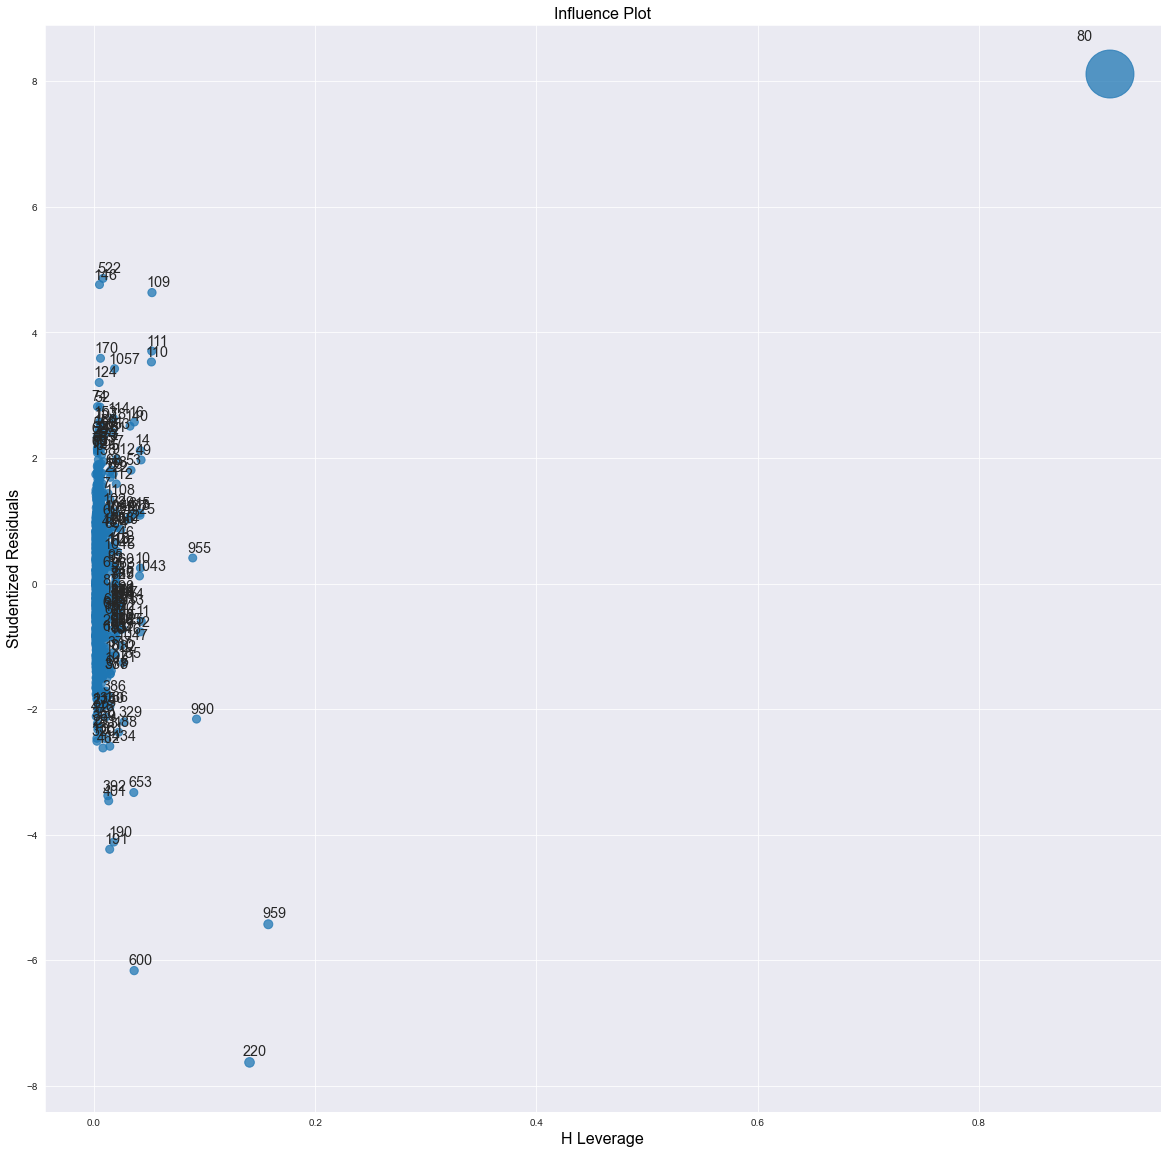

In \[41\]:

    # Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
    k=toyo4.shape[1]
    n=toyo4.shape[0]
    leverage_cutoff = (3*(k+1))/n
    leverage_cutoff

Out\[41\]:

    0.020905923344947737

In \[42\]:

    toyo4[toyo4.index.isin([80])] 

Out\[42\]:

|     | Price | Age | KM    | HP  | CC    | Doors | Gears | QT  | Weight |
|-----|-------|-----|-------|-----|-------|-------|-------|-----|--------|
| 80  | 18950 | 25  | 20019 | 110 | 16000 | 5     | 5     | 100 | 1180   |

### Improving the Model<a href="#Improving-the-Model" class="anchor-link">¶</a>

In \[43\]:

    # Creating a copy of data so that original dataset is not affected
    toyo_new=toyo4.copy()
    toyo_new

Out\[43\]:

|      | Price | Age | KM    | HP  | CC   | Doors | Gears | QT  | Weight |
|------|-------|-----|-------|-----|------|-------|-------|-----|--------|
| 0    | 13500 | 23  | 46986 | 90  | 2000 | 3     | 5     | 210 | 1165   |
| 1    | 13750 | 23  | 72937 | 90  | 2000 | 3     | 5     | 210 | 1165   |
| 2    | 13950 | 24  | 41711 | 90  | 2000 | 3     | 5     | 210 | 1165   |
| 3    | 14950 | 26  | 48000 | 90  | 2000 | 3     | 5     | 210 | 1165   |
| 4    | 13750 | 30  | 38500 | 90  | 2000 | 3     | 5     | 210 | 1170   |
| ...  | ...   | ... | ...   | ... | ...  | ...   | ...   | ... | ...    |
| 1430 | 7500  | 69  | 20544 | 86  | 1300 | 3     | 5     | 69  | 1025   |
| 1431 | 10845 | 72  | 19000 | 86  | 1300 | 3     | 5     | 69  | 1015   |
| 1432 | 8500  | 71  | 17016 | 86  | 1300 | 3     | 5     | 69  | 1015   |
| 1433 | 7250  | 70  | 16916 | 86  | 1300 | 3     | 5     | 69  | 1015   |
| 1434 | 6950  | 76  | 1     | 110 | 1600 | 5     | 5     | 19  | 1114   |

1435 rows × 9 columns

In \[44\]:

    # Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
    toyo5=toyo_new.drop(toyo_new.index[[80]],axis=0).reset_index(drop=True)
    toyo5

Out\[44\]:

|      | Price | Age | KM    | HP  | CC   | Doors | Gears | QT  | Weight |
|------|-------|-----|-------|-----|------|-------|-------|-----|--------|
| 0    | 13500 | 23  | 46986 | 90  | 2000 | 3     | 5     | 210 | 1165   |
| 1    | 13750 | 23  | 72937 | 90  | 2000 | 3     | 5     | 210 | 1165   |
| 2    | 13950 | 24  | 41711 | 90  | 2000 | 3     | 5     | 210 | 1165   |
| 3    | 14950 | 26  | 48000 | 90  | 2000 | 3     | 5     | 210 | 1165   |
| 4    | 13750 | 30  | 38500 | 90  | 2000 | 3     | 5     | 210 | 1170   |
| ...  | ...   | ... | ...   | ... | ...  | ...   | ...   | ... | ...    |
| 1429 | 7500  | 69  | 20544 | 86  | 1300 | 3     | 5     | 69  | 1025   |
| 1430 | 10845 | 72  | 19000 | 86  | 1300 | 3     | 5     | 69  | 1015   |
| 1431 | 8500  | 71  | 17016 | 86  | 1300 | 3     | 5     | 69  | 1015   |
| 1432 | 7250  | 70  | 16916 | 86  | 1300 | 3     | 5     | 69  | 1015   |
| 1433 | 6950  | 76  | 1     | 110 | 1600 | 5     | 5     | 19  | 1114   |

1434 rows × 9 columns

### Model Deletion Diagnostics and Final Model<a href="#Model-Deletion-Diagnostics-and-Final-Model" class="anchor-link">¶</a>

In \[45\]:

    while model.rsquared < 0.90:
        for c in [np.max(c)>0.5]:
            model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=toyo5).fit()
            (c,_)=model.get_influence().cooks_distance
            c
            np.argmax(c) , np.max(c)
            toyo5=toyo5.drop(toyo5.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
            toyo5
        else:
            final_model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=toyo5).fit()
            final_model.rsquared , final_model.aic
            print("Thus model accuracy is improved to",final_model.rsquared)

    Thus model accuracy is improved to 0.8765926307402282
    Thus model accuracy is improved to 0.8839684606741538
    Thus model accuracy is improved to 0.8882395145171204
    Thus model accuracy is improved to 0.8902571486612915
    Thus model accuracy is improved to 0.8909888960319987
    Thus model accuracy is improved to 0.8922595280462808
    Thus model accuracy is improved to 0.8933621011392295
    Thus model accuracy is improved to 0.8947147371605556
    Thus model accuracy is improved to 0.8955233405057648
    Thus model accuracy is improved to 0.8930210061069088
    Thus model accuracy is improved to 0.8939546425147169
    Thus model accuracy is improved to 0.8954112430715817
    Thus model accuracy is improved to 0.8960182592139028
    Thus model accuracy is improved to 0.8968403506948497
    Thus model accuracy is improved to 0.8964026771830705
    Thus model accuracy is improved to 0.8958538146890626
    Thus model accuracy is improved to 0.8953750500147551
    Thus model accuracy is improved to 0.8949455651565242
    Thus model accuracy is improved to 0.8960864004304145
    Thus model accuracy is improved to 0.8955820765034092
    Thus model accuracy is improved to 0.8930233902806168
    Thus model accuracy is improved to 0.8903879563757863
    Thus model accuracy is improved to 0.8895239558162494
    Thus model accuracy is improved to 0.8898960234448476
    Thus model accuracy is improved to 0.8903208318396924
    Thus model accuracy is improved to 0.8908014686337989
    Thus model accuracy is improved to 0.8901005575125875
    Thus model accuracy is improved to 0.8894678831369645
    Thus model accuracy is improved to 0.8894880027099145
    Thus model accuracy is improved to 0.8900243177601597
    Thus model accuracy is improved to 0.8894961653289413
    Thus model accuracy is improved to 0.8888300690207419
    Thus model accuracy is improved to 0.8890577556184879
    Thus model accuracy is improved to 0.8898790181431516
    Thus model accuracy is improved to 0.8905555862707121
    Thus model accuracy is improved to 0.8905494548555107
    Thus model accuracy is improved to 0.8907035715786529
    Thus model accuracy is improved to 0.8909968812264217
    Thus model accuracy is improved to 0.8912949497964373
    Thus model accuracy is improved to 0.8918388895715855
    Thus model accuracy is improved to 0.8926704315417882
    Thus model accuracy is improved to 0.8928840759989136
    Thus model accuracy is improved to 0.8933496039941571
    Thus model accuracy is improved to 0.8936856658122996
    Thus model accuracy is improved to 0.8944751976424921
    Thus model accuracy is improved to 0.893839548043574
    Thus model accuracy is improved to 0.8931993880518596
    Thus model accuracy is improved to 0.8925409392511808
    Thus model accuracy is improved to 0.8933274017072572
    Thus model accuracy is improved to 0.8919970006989908
    Thus model accuracy is improved to 0.891304915520342
    Thus model accuracy is improved to 0.8919967701898639
    Thus model accuracy is improved to 0.8925697842477825
    Thus model accuracy is improved to 0.892733433674135
    Thus model accuracy is improved to 0.8930373667898379
    Thus model accuracy is improved to 0.8936216177226137
    Thus model accuracy is improved to 0.8943831156038025
    Thus model accuracy is improved to 0.8946116437234872
    Thus model accuracy is improved to 0.8947373476692217
    Thus model accuracy is improved to 0.8950379522236931
    Thus model accuracy is improved to 0.8948527054861177
    Thus model accuracy is improved to 0.8953342154393777
    Thus model accuracy is improved to 0.895598439180588
    Thus model accuracy is improved to 0.8959887924407283
    Thus model accuracy is improved to 0.8949134651663618
    Thus model accuracy is improved to 0.8951494863024942
    Thus model accuracy is improved to 0.8955005725113694
    Thus model accuracy is improved to 0.8957248584395653
    Thus model accuracy is improved to 0.8954298292582191
    Thus model accuracy is improved to 0.8953618506400355
    Thus model accuracy is improved to 0.8956028020870668
    Thus model accuracy is improved to 0.8959330397949153
    Thus model accuracy is improved to 0.8962516478679261
    Thus model accuracy is improved to 0.896677152907062
    Thus model accuracy is improved to 0.8968748575434936
    Thus model accuracy is improved to 0.8967502968710409
    Thus model accuracy is improved to 0.8964643118227555
    Thus model accuracy is improved to 0.8968869273251256
    Thus model accuracy is improved to 0.8965702611797325
    Thus model accuracy is improved to 0.896465648982765
    Thus model accuracy is improved to 0.8967541657126812
    Thus model accuracy is improved to 0.8970295712331846
    Thus model accuracy is improved to 0.8970512860226794
    Thus model accuracy is improved to 0.8973242631620858
    Thus model accuracy is improved to 0.8976064036306222
    Thus model accuracy is improved to 0.8965027704321634
    Thus model accuracy is improved to 0.8969285366970443
    Thus model accuracy is improved to 0.8970144437559693
    Thus model accuracy is improved to 0.897464618358938
    Thus model accuracy is improved to 0.8977004418350514
    Thus model accuracy is improved to 0.8979562106578317
    Thus model accuracy is improved to 0.8980173910665002
    Thus model accuracy is improved to 0.8982290469246597
    Thus model accuracy is improved to 0.8981603329614346
    Thus model accuracy is improved to 0.8984954051008237
    Thus model accuracy is improved to 0.8988264391266801
    Thus model accuracy is improved to 0.8988386546358322
    Thus model accuracy is improved to 0.8990728046493341
    Thus model accuracy is improved to 0.8992884343762314
    Thus model accuracy is improved to 0.8995264042658645
    Thus model accuracy is improved to 0.8998346697166659
    Thus model accuracy is improved to 0.8999704768778106
    Thus model accuracy is improved to 0.9002238270483123
    Thus model accuracy is improved to 0.9003762532318559

In \[46\]:

    final_model.rsquared # Model Accuracy is increased to 90.02%

Out\[46\]:

    0.9003762532318559

In \[47\]:

    toyo5

Out\[47\]:

|      | Price | Age | KM    | HP  | CC   | Doors | Gears | QT  | Weight |
|------|-------|-----|-------|-----|------|-------|-------|-----|--------|
| 0    | 13750 | 23  | 72937 | 90  | 2000 | 3     | 5     | 210 | 1165   |
| 1    | 14950 | 26  | 48000 | 90  | 2000 | 3     | 5     | 210 | 1165   |
| 2    | 13750 | 30  | 38500 | 90  | 2000 | 3     | 5     | 210 | 1170   |
| 3    | 12950 | 32  | 61000 | 90  | 2000 | 3     | 5     | 210 | 1170   |
| 4    | 16900 | 27  | 94612 | 90  | 2000 | 3     | 5     | 210 | 1245   |
| ...  | ...   | ... | ...   | ... | ...  | ...   | ...   | ... | ...    |
| 1325 | 8450  | 80  | 23000 | 86  | 1300 | 3     | 5     | 69  | 1015   |
| 1326 | 7500  | 69  | 20544 | 86  | 1300 | 3     | 5     | 69  | 1025   |
| 1327 | 10845 | 72  | 19000 | 86  | 1300 | 3     | 5     | 69  | 1015   |
| 1328 | 8500  | 71  | 17016 | 86  | 1300 | 3     | 5     | 69  | 1015   |
| 1329 | 7250  | 70  | 16916 | 86  | 1300 | 3     | 5     | 69  | 1015   |

1330 rows × 9 columns

### Model Predictions<a href="#Model-Predictions" class="anchor-link">¶</a>

In \[48\]:

    # say New data for prediction is
    new_data=pd.DataFrame({'Age':12,"KM":40000,"HP":80,"CC":1300,"Doors":4,"Gears":5,"QT":69,"Weight":1012},index=[0])
    new_data

Out\[48\]:

|     | Age | KM    | HP  | CC   | Doors | Gears | QT  | Weight |
|-----|-----|-------|-----|------|-------|-------|-----|--------|
| 0   | 12  | 40000 | 80  | 1300 | 4     | 5     | 69  | 1012   |

In \[49\]:

    # Manual Prediction of Price
    final_model.predict(new_data)

Out\[49\]:

    0    14398.815471
    dtype: float64

In \[50\]:

    # Automatic Prediction of Price with 90.02% accurcy
    pred_y=final_model.predict(toyo5)
    pred_y

Out\[50\]:

    0       15354.362106
    1       15415.237858
    2       15314.008799
    3       14749.534289
    4       17544.273936
                ...     
    1325     7607.457292
    1326     9206.037539
    1327     8535.375501
    1328     8674.315161
    1329     8784.118985
    Length: 1330, dtype: float64

In \[ \]: